In [ ]:
#nbProjdeRecrutparDepartetparMéetier2016-2020

In [ ]:
#1 lire Fichier 2020

In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from google.colab import files
data_to_load = files.upload()
import io
df2020 = pd.read_csv(io.BytesIO(data_to_load['BMO2020.csv']),encoding='latin-1')
df2019 = pd.read_csv(io.BytesIO(data_to_load['BMO2019.csv']),encoding='latin-1')
df2018 = pd.read_csv(io.BytesIO(data_to_load['BMO2018.csv']),encoding='latin-1')
df2017 = pd.read_csv(io.BytesIO(data_to_load['BMO2017.csv']),encoding='latin-1')
df2016 = pd.read_csv(io.BytesIO(data_to_load['BMO2016.csv']),encoding='latin-1')
df2015 = pd.read_csv(io.BytesIO(data_to_load['BMO2015.csv']),encoding='latin-1')
df2014 = pd.read_csv(io.BytesIO(data_to_load['BMO2014.csv']),encoding='latin-1')
df2013 = pd.read_csv(io.BytesIO(data_to_load['BMO2013.csv']),encoding='latin-1')


Saving BMO2013.csv to BMO2013 (3).csv
Saving BMO2014.csv to BMO2014 (3).csv
Saving BMO2015.csv to BMO2015 (3).csv
Saving BMO2016.csv to BMO2016 (3).csv
Saving BMO2017.csv to BMO2017 (3).csv
Saving BMO2018.csv to BMO2018 (2).csv
Saving BMO2019.csv to BMO2019 (2).csv
Saving BMO2020.csv to BMO2020 (2).csv


#Read proj files 

In [ ]:
#Add year column

In [ ]:
df2020['Année']=2020
df2019['Année']=2019
df2018['Année']=2018
df2017['Année']=2017
df2016['Année']=2016
df2015['Année']=2015
df2014['Année']=2014
df2013['Année']=2013


In [ ]:
#Regrouper les dfdans un meme df
dfBMO1320 = pd.concat([df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020])
dfBMOnew1320.head()
dfBMO1320.describe()

,Agents administratifs des transports,Agents administratifs divers,Agents d'accueil et d'information,Agents de maîtrise en entretien,Agents de maîtrise et assimilés des industries de process,"Agents de maîtrise et assimilés en fabrication de matériel élec., électron.",Agents de maîtrise et assimilés en fabrication mécanique,Agents de sécurité et de surveillance,Agents de services hospitaliers,Agents d'entretien de locaux,Agents d'exploitation des transports,Agents et hôtesses d'accompagnement,"Agents immobiliers, syndics",Agents qualifiés de laboratoire,Agents qualifiés de traitement thermique et de surface,Agriculteurs salariés,Aides à domicile et aides ménagères,"Aides et apprentis de cuisine, employés polyvalents de la restauration",Aides-soignants,Apprentis et ouvriers non qualifiés de l'alimentation (hors industries agro-alimentaires),Architectes,Artisans et ouvriers qualifiés divers de type artisanal,"Artistes (musique, danse, spectacles)",Artistes plasticiens,Assistantes maternelles,Assistants de communication,Attachés commerciaux,Autres ouvriers non qualifiés de type industriel,Autres ouvriers qualifiés de type industriel,Autres ouvriers qualifiés des industries agro-alimentaires (hors transformation des viandes),Autres ouvriers qualifiés des industries chimiques et plastiques,"Autres ouvriers qualifiés en verre, céramique, métallurgie, matériaux de construction et énergie",Autres professionnels para-médicaux,Bouchers,"Boulangers, pâtissiers","Bûcherons, sylviculteurs salariés et agents forestiers","Cadres administratifs, comptables et financiers (hors juristes)","Cadres commerciaux, acheteurs et cadres de la mercatique",Cadres de la banque,Cadres de la communication,...,"Psychologues, psychothérapeutes",Régleurs,Représentants auprès des particuliers,Responsables logistiques (non cadres),Responsables magasinage,Sages-femmes,Secrétaires bureautiques et assimilés,Secrétaires de direction,Serveurs de cafés restaurants,Soudeurs,Spécialistes de l'appareillage médical,Sportifs et animateurs sportifs,Surveillants d'établissements scolaires,Techn. et agents de maîtrise de la maintenance et de l'environnement,"Techn. et agents de maîtrise des matériaux souples, du bois et des indust. graphiques",Techn. et agents d'encadrement d'exploitations agricoles,Techniciens de la banque,Techniciens des assurances,Techniciens des industries de process,Techniciens des services administratifs,Techniciens des services aux utilisateurs en informatique,Techniciens des services comptables et financiers,Techniciens des transports et du tourisme,Techniciens d'étude et de développement en informatique,Techniciens en électricité et en électronique,Techniciens en mécanique et travail des métaux,Techniciens et chargés d'études du BTP,Techniciens experts,Techniciens médicaux et préparateurs,Télévendeurs,Tuyauteurs,"Vendeurs en ameublement, équipement du foyer, bricolage",Vendeurs en gros de matériel et équipements,"Vendeurs en habillement et accessoires (luxe, sport, loisirs et culturels)",Vendeurs en produits alimentaires,Vendeurs généralistes,Vétérinaires,"Viticulteurs, arboriculteurs salariés",Total,Année
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816

In [ ]:
dfBMOnew1320=dfBMO1320.drop(columns=['Total'])
dfBMOnew11320=dfBMOnew1320[:dfBMOnew1320.shape[0]-1]
dfBMOnew11320


,Département,Agents administratifs des transports,Agents administratifs divers,Agents d'accueil et d'information,Agents de maîtrise en entretien,Agents de maîtrise et assimilés des industries de process,"Agents de maîtrise et assimilés en fabrication de matériel élec., électron.",Agents de maîtrise et assimilés en fabrication mécanique,Agents de sécurité et de surveillance,Agents de services hospitaliers,Agents d'entretien de locaux,Agents d'exploitation des transports,Agents et hôtesses d'accompagnement,"Agents immobiliers, syndics",Agents qualifiés de laboratoire,Agents qualifiés de traitement thermique et de surface,Agriculteurs salariés,Aides à domicile et aides ménagères,"Aides et apprentis de cuisine, employés polyvalents de la restauration",Aides-soignants,Apprentis et ouvriers non qualifiés de l'alimentation (hors industries agro-alimentaires),Architectes,Artisans et ouvriers qualifiés divers de type artisanal,"Artistes (musique, danse, spectacles)",Artistes plasticiens,Assistantes maternelles,Assistants de communication,Attachés commerciaux,Autres ouvriers non qualifiés de type industriel,Autres ouvriers qualifiés de type industriel,Autres ouvriers qualifiés des industries agro-alimentaires (hors transformation des viandes),Autres ouvriers qualifiés des industries chimiques et plastiques,"Autres ouvriers qualifiés en verre, céramique, métallurgie, matériaux de construction et énergie",Autres professionnels para-médicaux,Bouchers,"Boulangers, pâtissiers","Bûcherons, sylviculteurs salariés et agents forestiers","Cadres administratifs, comptables et financiers (hors juristes)","Cadres commerciaux, acheteurs et cadres de la mercatique",Cadres de la banque,...,Professions intermédiaires commerciales,"Psychologues, psychothérapeutes",Régleurs,Représentants auprès des particuliers,Responsables logistiques (non cadres),Responsables magasinage,Sages-femmes,Secrétaires bureautiques et assimilés,Secrétaires de direction,Serveurs de cafés restaurants,Soudeurs,Spécialistes de l'appareillage médical,Sportifs et animateurs sportifs,Surveillants d'établissements scolaires,Techn. et agents de maîtrise de la maintenance et de l'environnement,"Techn. et agents de maîtrise des matériaux souples, du bois et des indust. graphiques",Techn. et agents d'encadrement d'exploitations agricoles,Techniciens de la banque,Techniciens des assurances,Techniciens des industries de process,Techniciens des services administratifs,Techniciens des services aux utilisateurs en informatique,Techniciens des services comptables et financiers,Techniciens des transports et du tourisme,Techniciens d'étude et de développement en informatique,Techniciens en électricité et en électronique,Techniciens en mécanique et travail des métaux,Techniciens et chargés d'études du BTP,Techniciens experts,Techniciens médicaux et préparateurs,Télévendeurs,Tuyauteurs,"Vendeurs en ameublement, équipement du foyer, bricolage",Vendeurs en gros de matériel et équipements,"Vendeurs en habillement et accessoires (luxe, sport, loisirs et culturels)",Vendeurs en produits alimentaires,Vendeurs généralistes,Vétérinaires,"Viticulteurs, arboriculteurs salariés",Année
0,Ain01,0,90,150,10,30,0,0,90,170,830,10,10,10,10,0,340,470,290,330,90,0,10,100,0,20,0,340,40,30,70,80,90,30,20,60,10,60,20,10,...,10,10,10,20,10,20,30,190,20,370,50,10,150,110,120,0,20,10,0,30,30,30,10,0,40,30,20,10,0,30,30,0,70,10,300,40,50,0,90,2013
1,Aisne02,0,100,60,10,0,0,0,130,60,750,10,0,20,20,10,430,260,280,250,50,10,0,110,0,40,10,80,20,30,140,10,20,70,0,10,20,30,10,140,...,0,10,0,90,0,0,0,80,20,180,40,0,100,40,90,0,0,10,0,0,20,0,10,0,0,20,10,10,0,30,110,10,10,0,80,60,10,10,2890,2013
2,Allier03,0,50,50,0,0,0,0,10,140,240,0,50,60,10,0,250,360,220,160,80,0,10,30,0,20,10,90,80,0,20,60,10,30,40,10,20,0,10,0,...,10,0,10,20,10,20,0,130,20,180,20,10,90,30,30,0,0,0,0,10,10,20,0,10,10,0,10,0,0,0,20,10,0,0,70,70,30,20,50,2013
3,Alpes-de-Haute-Provence04,0,30,70,10,10,0,0,40,40,260,0,20,0,10,0,630,170,440,100,0,0,0,70,0,10,20,50,0,

In [ ]:
#unpivoter les colonnes Métiers
dfBMO1320_unpivoted = dfBMOnew11320.melt(id_vars=['Département','Année'], var_name='metier', value_name='nbproj')

In [ ]:
#covert nbrproj to int
dfBMO1320_unpivoted['nbproj']=pd.to_numeric(dfBMO1320_unpivoted['nbproj'], errors='coerce')
dfBMO1320_unpivoted['nbproj']=dfBMO1320_unpivoted['nbproj'].fillna(0.0).astype(int)

dfBMO1320_unpivoted

dfBMO1320_unpivoted.isna().any()


Département    False
Année          False
metier         False
nbproj         False
dtype: bool

In [ ]:

dfBMO1320_unpivoted['Année']=dfBMO1320_unpivoted['Année'].astype(str).astype('category').cat.codes
dfBMO1320_unpivoted['Département']=dfBMO1320_unpivoted['Département'].astype(str).astype('category').cat.codes
dfBMO1320_unpivoted['metier']=dfBMO1320_unpivoted['metier'].astype(str).astype('category').cat.codes


In [ ]:
dfBMO1320_unpivoted

,Département,Année,metier,nbproj
0,1,0,0,0
1,3,0,0,0
2,5,0,0,0
3,9,0,0,0
4,109,0,0,0
...,...,...,...,...
162995,86,7,198,80
162996,160,7,198,80
162997,88,7,198,0
162998,132,7,198,20


In [ ]:
dfBMO1320_unpivoted.describe()

,Département,Année,metier,nbproj
count,163000.000000,163000.000000,163000.000000,163000.000000
mean,124.847853,3.495706,99.500000,189.459325
std,72.048306,2.289416,57.734482,1833.705185
min,0.000000,0.000000,0.000000,0.000000
25%,65.000000,1.000000,49.750000,0.000000
50%,125.000000,3.000000,99.500000,20.000000
75%,185.000000,5.000000,149.250000,80.000000
max,246.000000,7.000000,199.000000,141380.000000


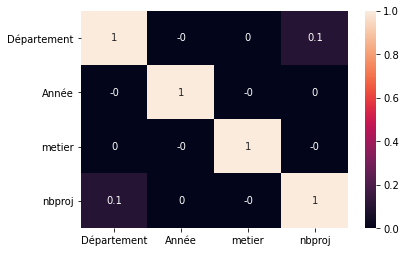

In [ ]:
#etude de la correlation
matrice_corr = dfBMO1320_unpivoted.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)